In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import random

In [2]:
img_list = sorted(glob.glob('./image2/*.jpg'))
mask_list = sorted(glob.glob('./mask2/*.jpg'))

print(len(img_list), len(mask_list))
print(img_list[0], mask_list[0])

5678 5678
./image2/001_000067.jpg ./mask2/001_000067.jpg


In [3]:
# Preprocessing
mask_cv = []
img_cv = []
for i in range(len(mask_list)):
    mask = cv2.imread(mask_list[i], 0)
    mask = cv2.resize(mask, (256,256))
    ret,mask = cv2.threshold(mask,127,255,cv2.THRESH_BINARY)
    mask_cv.append(mask)

# img 256x256
for i in range(len(img_list)):
    img = cv2.imread(img_list[i], 0)
    img = cv2.resize(img, (256, 256))
    img_cv.append(img)
    

In [4]:
indices = np.where(mask_cv[5] != [0])
y, x = indices[0], indices[1]
coordinates = np.array((x,y))
print(sum(x)/len(x), sum(y)/len(y))


169.02866242038218 130.85138004246284


In [21]:
# Crop by Center of Gravity

def randomCrop_CoG(img, mask, size):
    
    indices = np.where(mask != [0])
    y, x = indices[0], indices[1]
    a, b = (min(x), min(y)) # Lower Left Corner 
    W = (max(x) - min(x)) # Width  
    h = (max(y) - min(y)) # Height
    
    x = int(a+W/2)
    y = int(b+h/2)
    
    mask = mask[int(y-size/2):int(y+size/2), int(x-size/2):int(x+size/2)]
    img = img[int(y-size/2):int(y+size/2), int(x-size/2):int(x+size/2)]

    return img, mask


/Users/jaehoshin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


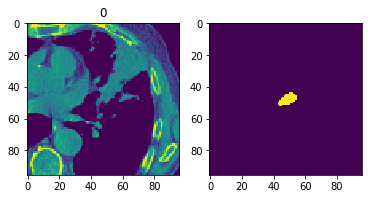

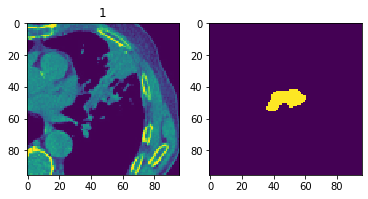

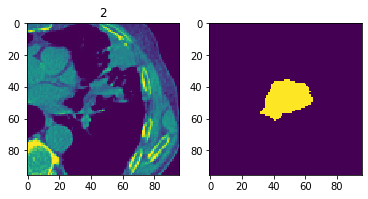

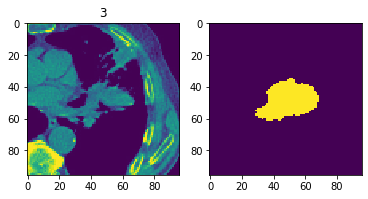

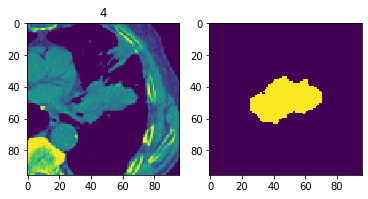

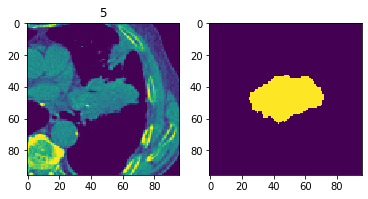

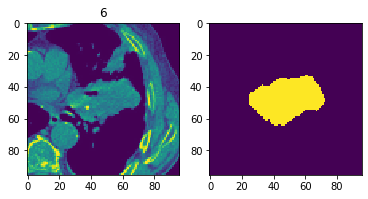

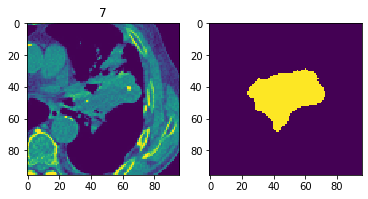

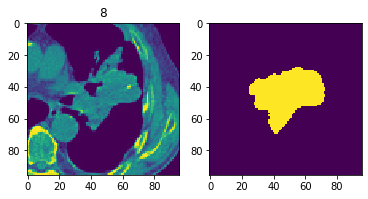

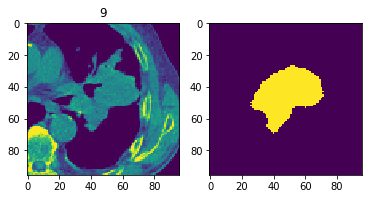

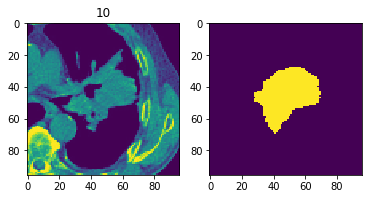

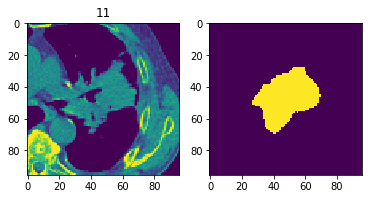

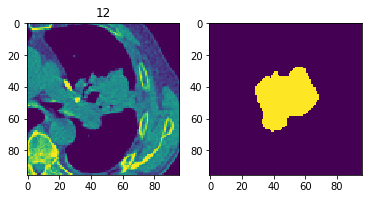

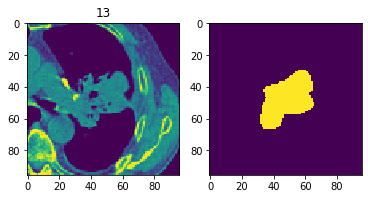

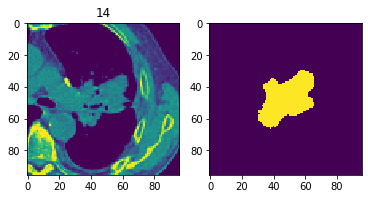

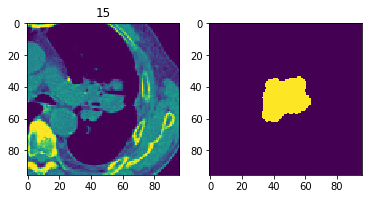

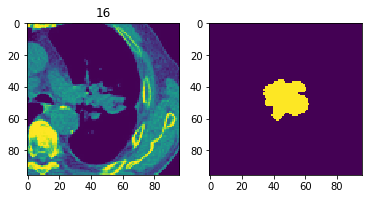

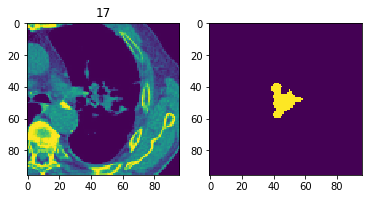

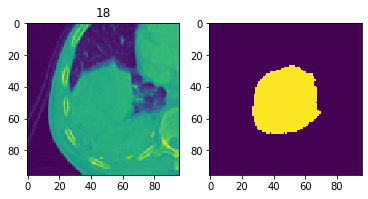

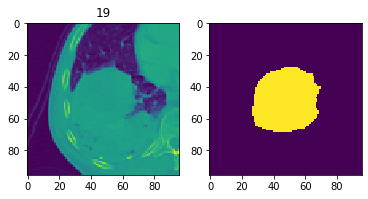

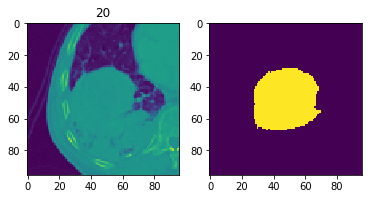

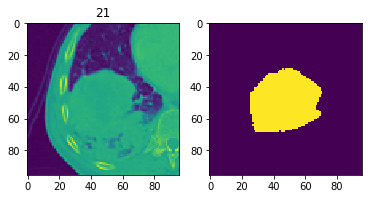

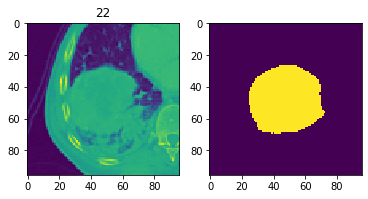

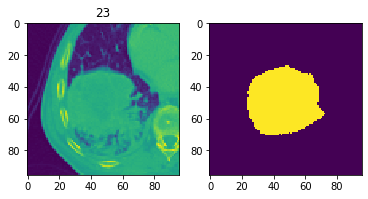

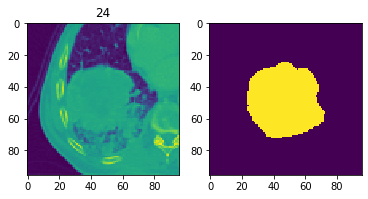

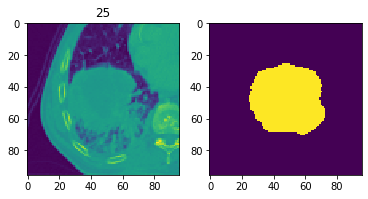

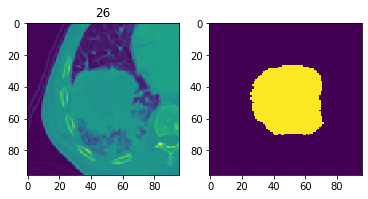

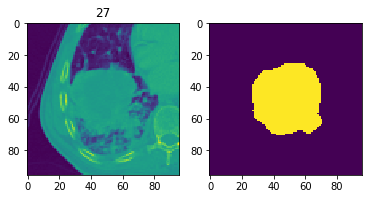

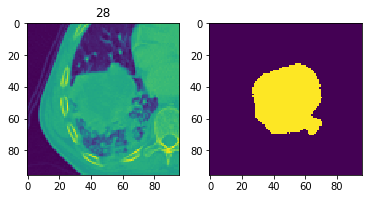

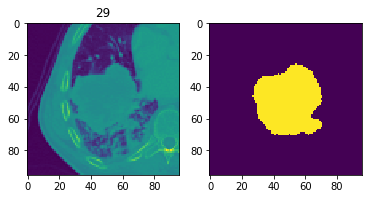

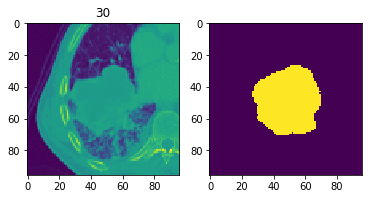

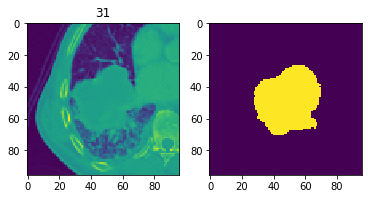

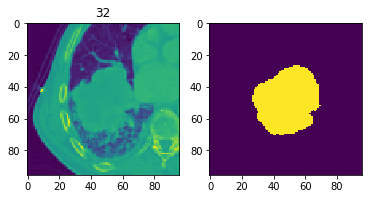

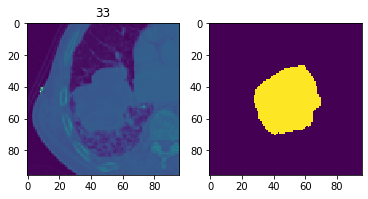

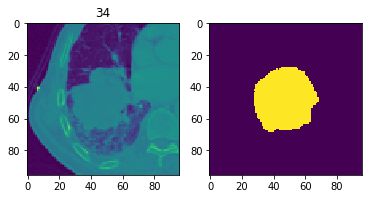

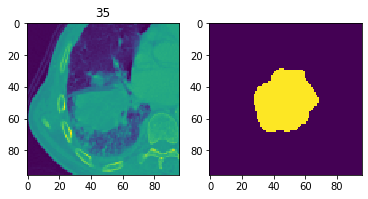

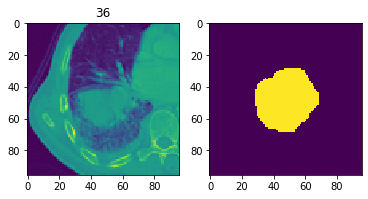

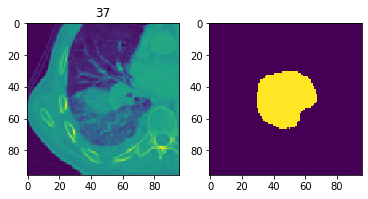

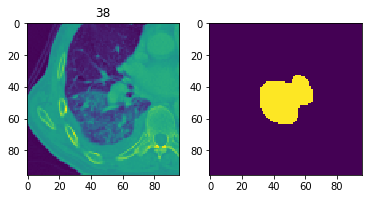

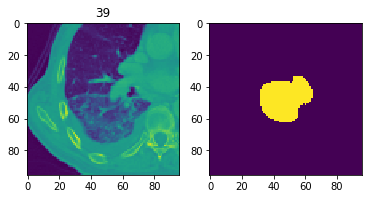

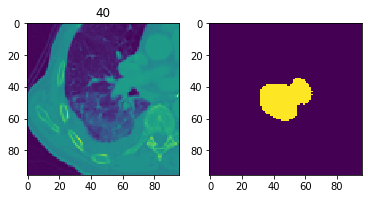

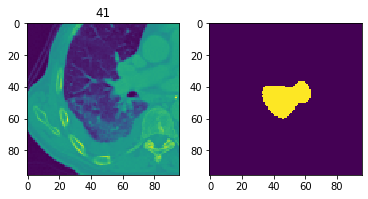

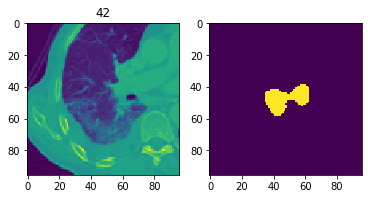

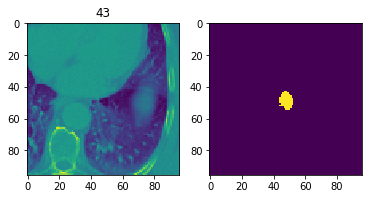

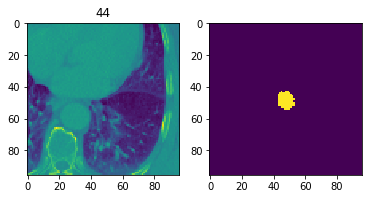

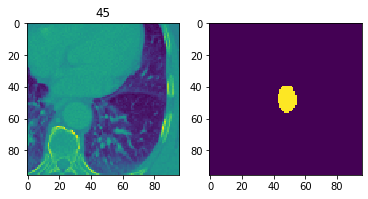

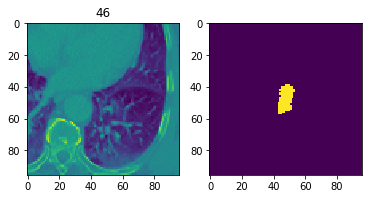

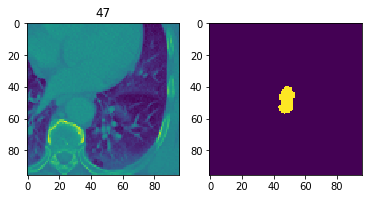

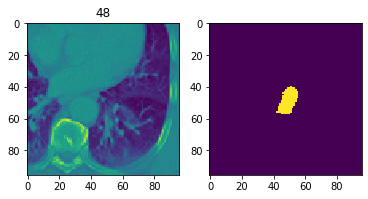

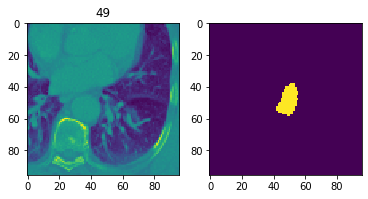

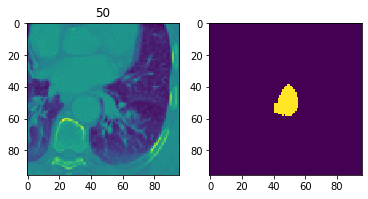

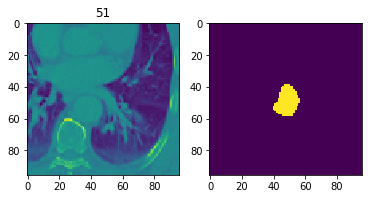

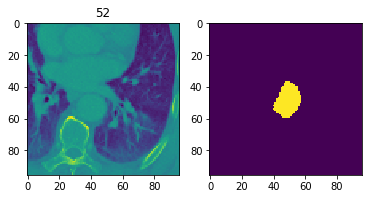

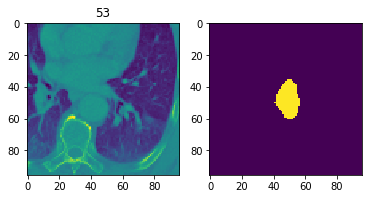

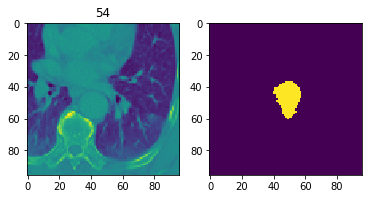

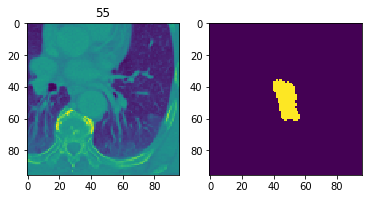

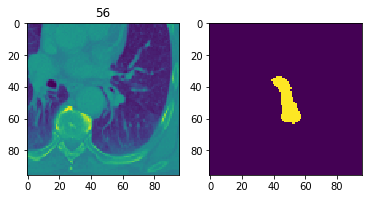

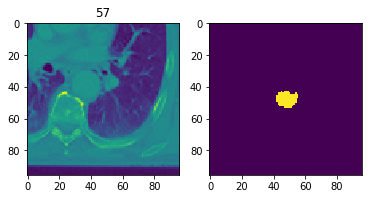

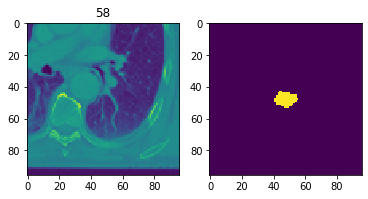

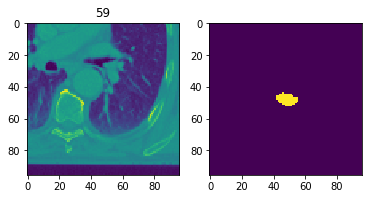

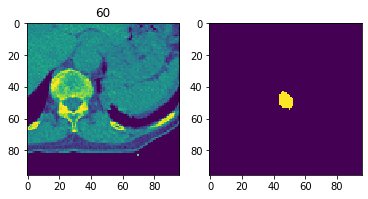

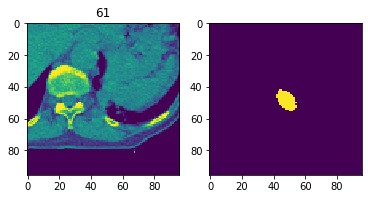

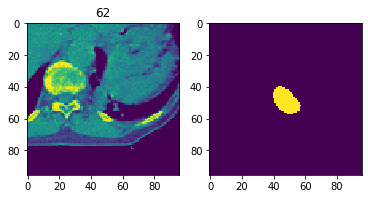

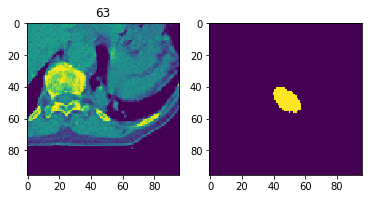

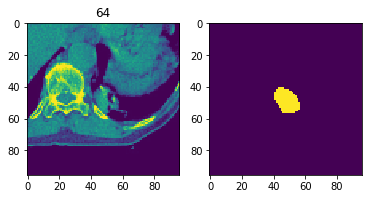

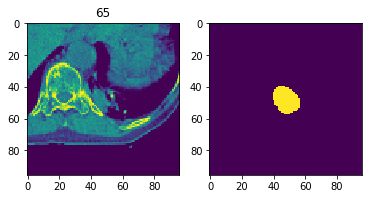

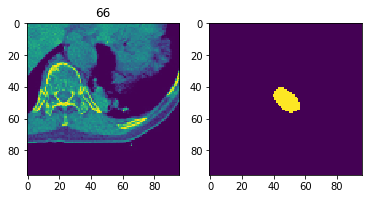

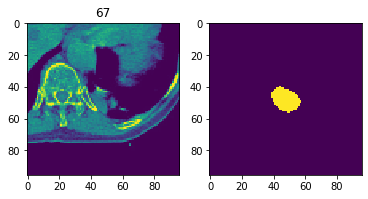

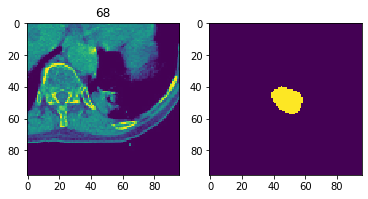

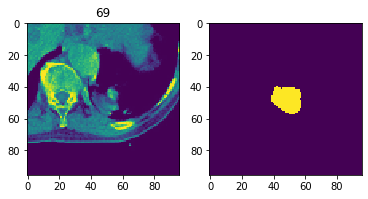

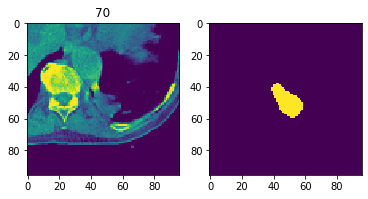

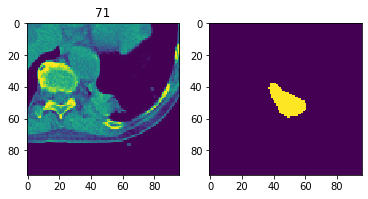

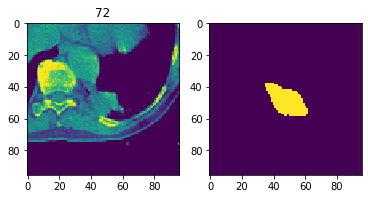

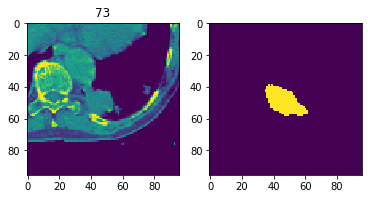

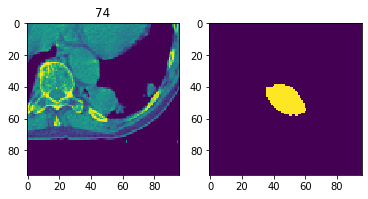

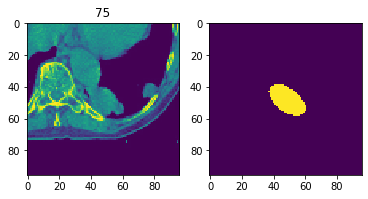

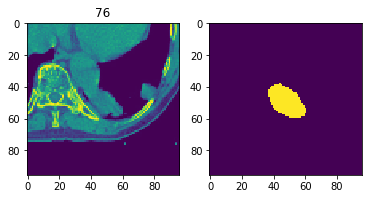

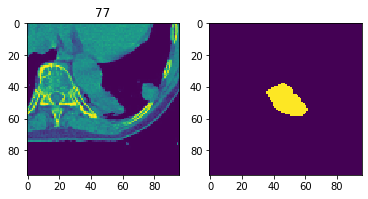

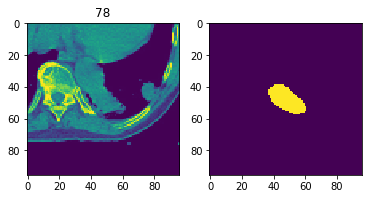

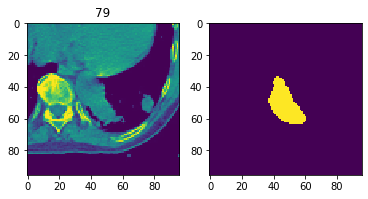

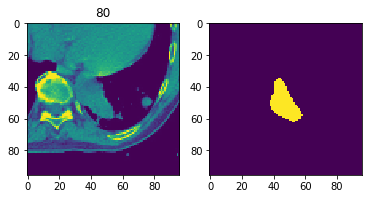

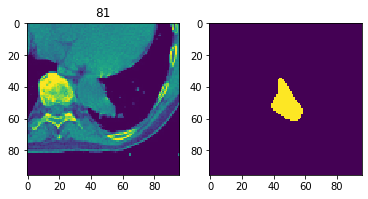

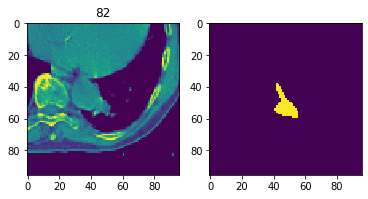

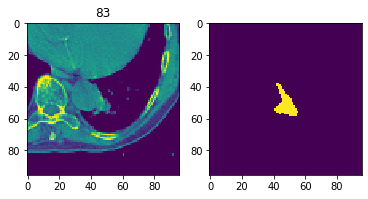

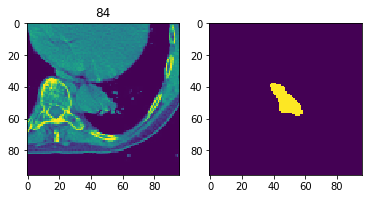

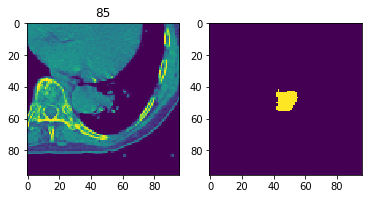

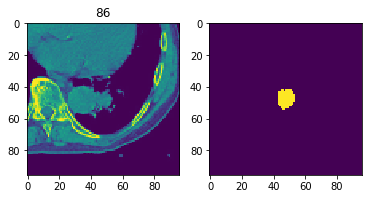

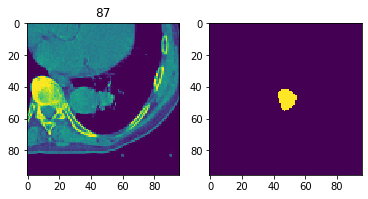

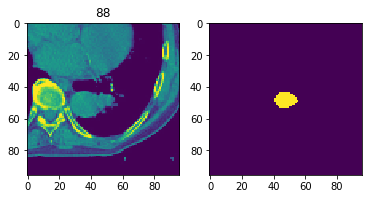

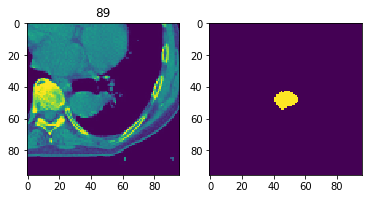

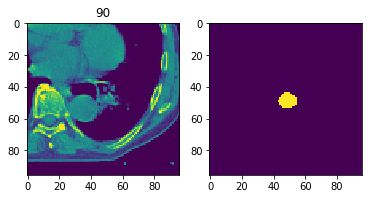

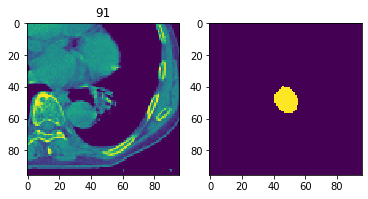

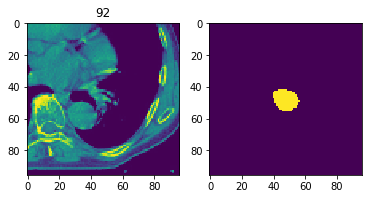

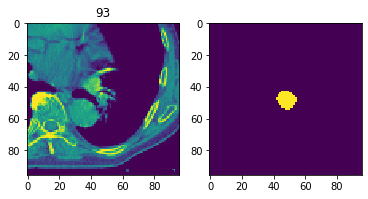

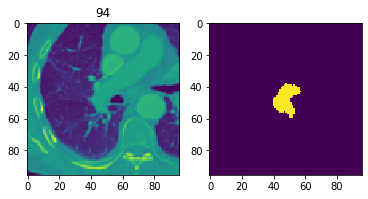

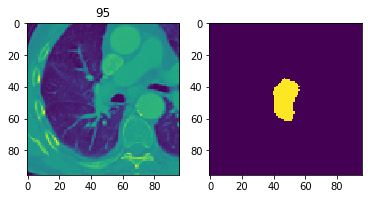

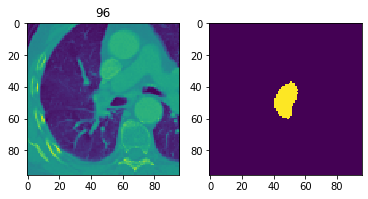

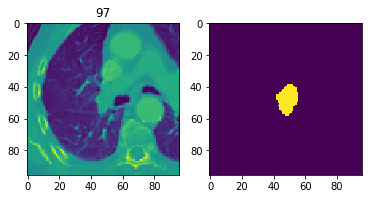

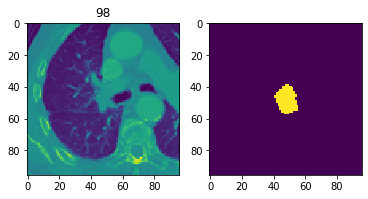

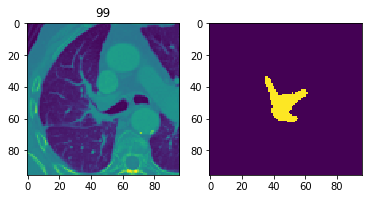

In [20]:
# Test

for i in range(100):
    
    img_path = img_list[i][9:19]
    mask_path = mask_list[i][8:18]
    
    img, mask = randomCrop_CoG(img_cv[i], mask_cv[i], 96)
        
    plt.figure()
    plt.subplot(1,2,1)
    plt.title(i)
    plt.imshow(img)
        
    plt.subplot(1,2,2)
    plt.imshow(mask)
        
        #cv2.imwrite('./crop_image/' + img_path + '_' + str(j+1) + '.jpg', img)
        #cv2.imwrite('./crop_mask/' + mask_path + '_' + str(j+1) + '.jpg', mask)
        

In [24]:
# Saving RandomCrop_CoG

for i in range(len(img_list)):
    
    img_path = img_list[i][9:19]
    mask_path = mask_list[i][8:18]
    
    img, mask = randomCrop_CoG(img_cv[i], mask_cv[i], 96)
     
    cv2.imwrite('./image_cog_96/' + img_path + '_' + '.jpg', img)
    cv2.imwrite('./mask_cog_96/' + mask_path + '_' + '.jpg', mask)
        

In [ ]:
# Main Full Random (Use if size is less than 128)

def randomCrop(img, mask, size):
    
    indices = np.where(mask != [0])
    y, x = indices[0], indices[1]
    a, b = (min(x), min(y)) # Lower Left Corner 
    W = (max(x) - min(x)) # Width  
    h = (max(y) - min(y)) # Height
    #print(a, b, W, h)
    
    if max(0, int(a+W) - size) > min(int(a), int(size)):
        #x = random.randint(max(0, int(a) - size), min(int(a), int(size)))
        x = random.randint(a-2*W, a-W)
        
    else: 
        x = random.randint(max(0, int(a+W) - size), min(int(a), int(size)))
        
    if max(0, int(b+h) - size) > min(int(b), int(size)):
        #y = random.randint(max(0, int(b) - size), min(int(b), int(size)))
        y = random.randint(b-2*h, b-h)
    
    else:
        y = random.randint(max(0, int(b+h) - size), min(int(b), int(size)))
        

    #print(x,y)
    
    mask = mask[y:y+size, x:x+size]
    img = img[y:y+size, x:x+size]

    return img, mask

In [ ]:
# Main Randomness reduced ( Use if size is greater or equal to 128)
def randomCrop(img, mask, size):
    
    indices = np.where(mask != [0])
    y, x = indices[0], indices[1]
    a, b = (min(x), min(y)) # Lower Left Corner 
    W = (max(x) - min(x)) # Width  
    h = (max(y) - min(y)) # Height
    print(a, b, W, h)
    
    if max(20, int(a+W - size)) > min(int(a*0.8), int(size)):
        x = random.randint(max(0, int(a+W - size)), min(int(a), int(size)))
           
    else: 
        x = random.randint(max(20, int(a+W - size)), min(int(a*0.8), int(size)))
        
    if max(20, int(b+h - size)) > min(int(b*0.8), int(size)):
        y = random.randint(max(0, int(b+h - size)), min(int(b), int(size)))
            
    else:
        y = random.randint(max(20, int(b+h - size)), min(int(b*0.8), int(size)))
   
    print(x,y)
    
    mask = mask[y:y+size, x:x+size]
    img = img[y:y+size, x:x+size]

    return img, mask

In [ ]:
# Saving RandomCrop

for i in range(len(img_list)):
    
    img_path = img_list[i][9:19]
    mask_path = mask_list[i][8:18]
    
    for j in range(4):
        
        img, mask = randomCrop(img_cv[i], mask_cv[i], 96)
     
        cv2.imwrite('./crop_image_96_2/' + img_path + '_' + str(j+1) + '.jpg', img)
        cv2.imwrite('./crop_mask_96_2/' + mask_path + '_' + str(j+1) + '.jpg', mask)
        


In [ ]:
# Test

for i in range(100):
    
    img_path = img_list[i][9:19]
    mask_path = mask_list[i][8:18]
    
    img, mask = randomCrop(img_cv[i], mask_cv[i], 128)
        
    plt.figure()
    plt.subplot(1,2,1)
    plt.title(i)
    plt.imshow(img)
        
    plt.subplot(1,2,2)
    plt.imshow(mask)
        
        #cv2.imwrite('./crop_image/' + img_path + '_' + str(j+1) + '.jpg', img)
        #cv2.imwrite('./crop_mask/' + mask_path + '_' + str(j+1) + '.jpg', mask)
        